<a href="https://colab.research.google.com/github/satyajitghana/TSAI-DeepVision-EVA4.0-Phase-2/blob/master/06-GenerativeAdversarialNetworks/RedCarGAN_DatasetCreation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
! git clone https://github.com/satyajitghana/TSAI-DeepVision-EVA4.0-Phase-2

Cloning into 'TSAI-DeepVision-EVA4.0-Phase-2'...
remote: Enumerating objects: 3059, done.
remote: Counting objects: 100% (3059/3059), done.
remote: Compressing objects: 100% (3033/3033), done.
remote: Total 3523 (delta 49), reused 3016 (delta 24), pack-reused 464
Receiving objects: 100% (3523/3523), 95.31 MiB | 33.95 MiB/s, done.
Resolving deltas: 100% (195/195), done.


In [ ]:
%cd /content/TSAI-DeepVision-EVA4.0-Phase-2/06-GenerativeAdversarialNetworks

/content/TSAI-DeepVision-EVA4.0-Phase-2/06-GenerativeAdversarialNetworks


# Dataset Creation

In [ ]:
from pathlib import Path
from PIL import Image
from random import shuffle
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## Process the Dataset and resize the images to `100x100`

In [ ]:
car_images = Path('car_images').glob('*')
car_images = list(car_images)

In [ ]:
out_dir = Path('car_images_100x100/red_cars')
out_dir.mkdir(parents=True, exist_ok=True)

In [ ]:
shuffle(car_images) # shuffle the images (why ? aise hee sexy lag raha tha)
for idx, car_image in enumerate(car_images):
    try:
        image = Image.open(car_image)
        image = image.convert('RGB')
        image = image.resize((100, 100)) # resize to `100x100`
        image.save(out_dir / f'car_{idx:04}.jpg')
    except:
        pass

In [ ]:
total = len(car_images)
processed = len(list(out_dir.glob('*')))
print(f'=> Processed {processed}/{total} images')

=> Processed 1463/1463 images


## Visualization and Statistics

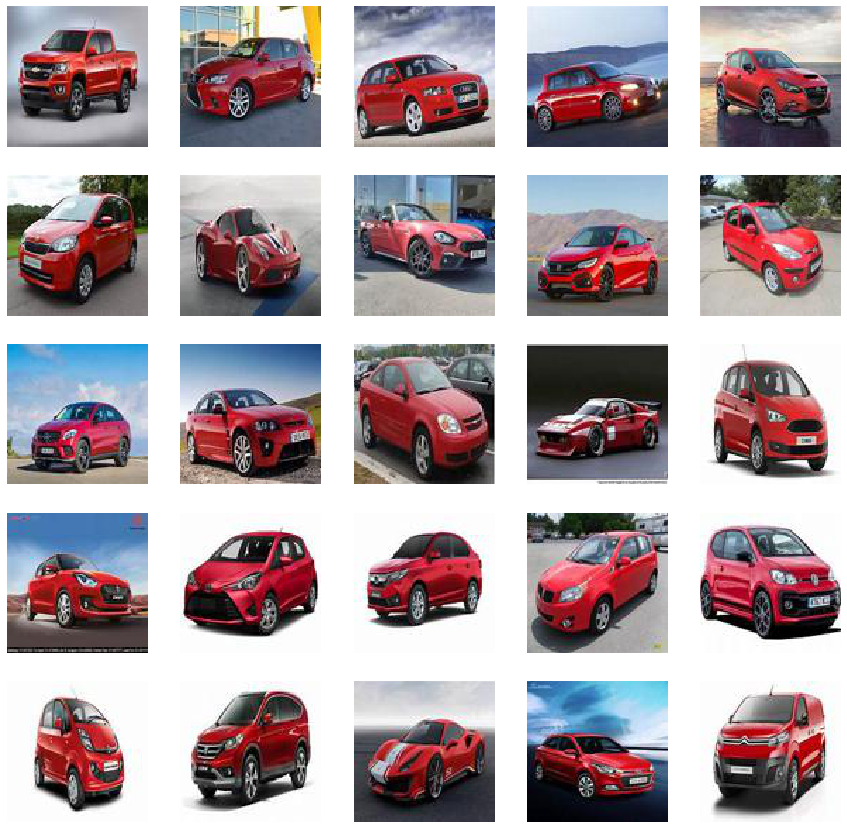

In [ ]:
plt.figure(figsize=(15, 15))
for idx, image_path in enumerate(list(out_dir.glob('*'))[:25]):
    plt.subplot(5, 5, idx+1)
    plt.imshow(Image.open(image_path))
    plt.axis('off')
    plt.grid('off')
plt.show()

In [ ]:
ls

car_images/  DatasetCreation.ipynb  red_car_images_100x100/


In [ ]:
import torch
from torchvision.datasets import ImageFolder
import torchvision.transforms as T

In [ ]:
def get_mean_and_std(dataset):
    '''Compute the mean and std value of dataset.'''
    dataloader = torch.utils.data.DataLoader(
        dataset, batch_size=1, shuffle=True, num_workers=2)
    mean = torch.zeros(3)
    std = torch.zeros(3)
    print('==> Computing mean and std..')
    for inputs, targets in dataloader:
        for i in range(3):
            mean[i] += inputs[:, i, :, :].mean()
            std[i] += inputs[:, i, :, :].std()
    mean.div_(len(dataset))
    std.div_(len(dataset))
    return mean, std

In [ ]:
transforms = T.Compose([T.ToTensor()])
dataset = ImageFolder('car_images_100x100', transform=transforms)
mean, std = get_mean_and_std(dataset)
f"mean = {[f'{m:.15f}' for m in mean]}", f"std = {[f'{s:.15f}' for s in std]}"

==> Computing mean and std..


("mean = ['0.570838093757629', '0.479552984237671', '0.491760671138763']",
 "std = ['0.279659748077393', '0.309973508119583', '0.311098515987396']")

In [ ]:
transforms = T.Compose([T.ToTensor()])
dataset = ImageFolder('car_images_100x100', transform=transforms)
dataloader = torch.utils.data.DataLoader(dataset, batch_size=25, shuffle=True, num_workers=2)

In [ ]:
batch = next(iter(dataloader))

In [ ]:
def visualize(batch, rows=5, cols=5):
    images, labels = batch
    plt.figure(figsize=(15, 15))
    for idx, image in enumerate(images):
        plt.subplot(5, 5, idx+1)
        plt.imshow(image.cpu().permute(1, 2, 0).numpy())
        plt.axis('off')
        plt.grid('off')
    plt.show()

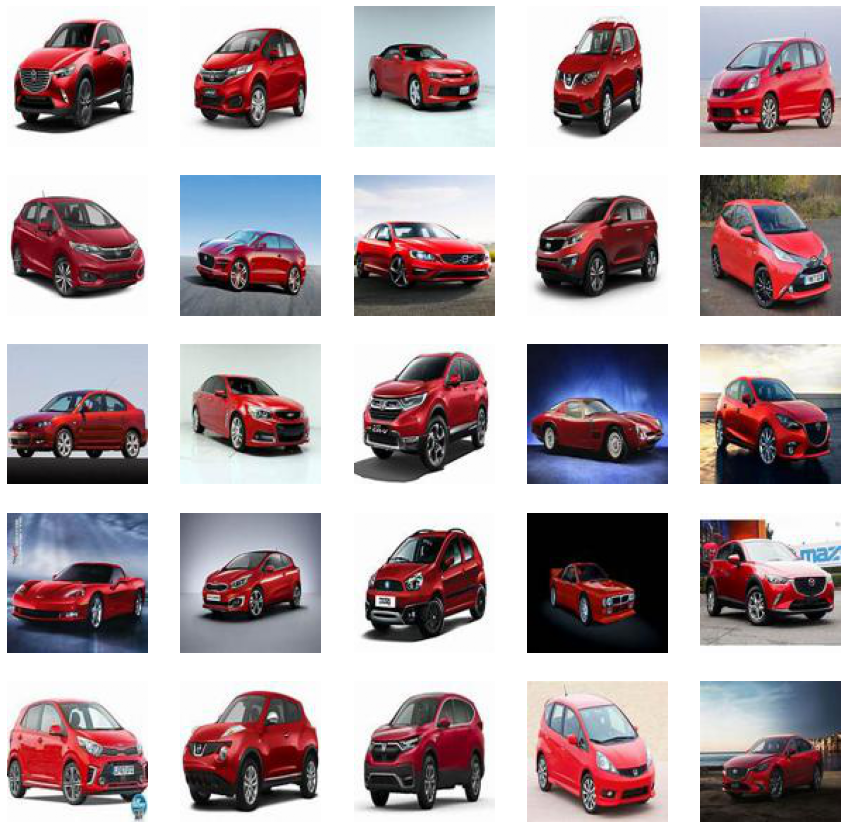

In [ ]:
visualize(batch)